In [ ]:
import numpy as np
import pandas as pd
import sklearn
import os
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import time

# reducing the classes number to 7 classes

# pd.options.display.max_columns = 5000
# pd.options.display.max_rows = 5000

import os
import logging
import pandas as pd

import tensorflow as tf
from tensorflow import keras
# from tensorflow.keras.utils import plot_model


from sklearn.feature_selection import RFE
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier




from collections import Counter

from sklearn.metrics import classification_report, confusion_matrix



# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.combine import SMOTETomek
# from imblearn.combine import SMOTEENN
# from imblearn.under_sampling import TomekLinks
# from imblearn.over_sampling import ADASYN

In [ ]:
df1=pd.read_csv("../MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df2=pd.read_csv("../MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df3=pd.read_csv("../MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv")
df4=pd.read_csv("../MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv")
df5=pd.read_csv("../MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df6=pd.read_csv("../MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df7=pd.read_csv("../MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv")
df8=pd.read_csv("../MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv")


df = pd.concat([df1,df2])
del df1,df2
df = pd.concat([df,df3])
del df3
df = pd.concat([df,df4])
del df4
df = pd.concat([df,df5])
del df5
df = pd.concat([df,df6])
del df6
df = pd.concat([df,df7])
del df7
df = pd.concat([df,df8])
del df8


In [ ]:
df[' Label'].replace("Web.*", "Web Attack", regex=True, inplace=True)
df[' Label'].replace(r'.*Patator$', "Brute Force", regex=True,inplace=True)
df[' Label'].replace(["DoS GoldenEye", "DoS Hulk", "DoS Slowhttptest", "DoS slowloris"], "DDoS/DoS", inplace=True)
df[' Label'].replace(["DDoS"], "DDoS/DoS", inplace=True)
df[' Label'].replace(["Heartbleed"], "DDoS/DoS", inplace=True)

df[' Label'].value_counts()

BENIGN          2273097
DDoS/DoS         380699
PortScan         158930
Brute Force       13835
Web Attack         2180
Bot                1966
Infiltration         36
Name:  Label, dtype: int64

In [ ]:
# removing the whitespace from the feature names
columns = []
for i in df.columns:
  columns.append(i.strip())

print(columns)

df.columns = columns

['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count

In [ ]:
df = df.sample(frac=1)


y = LabelEncoder().fit_transform(df['Label'])


# Fill NaN with average value of each class in this dataset
# nan_rows = df[df.isna().any(axis=1)].shape[0]
x_data = df.drop(columns=['Label'], axis=1)



for i in x_data:
  x_data[i].fillna(value= x_data[i].mean(), inplace=True)


# Temporary replace inf with NaN
x_data = x_data.replace([np.inf], np.nan)
# Replace inf with maximum value of each class in this dataset

for i in x_data:
  x_data[i].fillna(value= x_data[i].max(), inplace=True)


print("Replace negative values with minimum value of each class.")
# Temporary replace negative value with NaN
x_data[x_data < 0] = np.nan
# Replace negative value with minimum value of each class in this datase

for i in x_data:
  x_data[i].fillna(value= x_data[i].min(), inplace=True)




x = x_data.astype('float32')

# ## normalization
# scaler = StandardScaler()

# # scaler = MinMaxScaler()


# x = scaler.fit_transform(x)



# Method One

scaled_features = StandardScaler().fit_transform(x.values)

scaled_features_df = pd.DataFrame(scaled_features, index=x.index, columns=x.columns)

x = scaled_features_df

scaled_features_df = [0]


# Method two

# scaler = StandardScaler()

# for column in x.columns:
#     df[column] = x[column].apply(lambda x: scaler.fit_transform(x.reshape(-1, 1)).flatten())

# x = df

# df = 0
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
# removing all the element from the array to reduce the RAM usage
# x_data = [0]

Replace negative values with minimum value of each class.


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=8, stratify= y)

In [ ]:
def evaluation(model: keras.Model, x_test, y_test):

  from sklearn.metrics import recall_score, precision_score, precision_score, f1_score
  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import roc_curve, auc

    # to change the color
  class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'



  score = model.evaluate(x_test, y_test, verbose=False)
  print('Evaluation:\nLoss: {}\nAccuracy : {}\n'.format(score[0], score[1]))
  label_multi_class = ['BENIGN', 'Bot', 'Brute Force', 'DDoS/DoS', 'Infiltration', 'PortScan', 'Web Attack']
  # F1 score
  y_pred = model.predict(x_test, batch_size=1024, verbose=True)
  y_pred = np.argmax(y_pred, axis=1)

    # it is for multi classification
  label_multi_class = ['BENIGN', 'Bot', 'Brute Force', 'DDoS/DoS', 'Infiltration', 'PortScan', 'Web Attack']

  # it is for binary classification
  label = ['normal', 'attack']
  # classification report
  print("\n{}".format(classification_report(y_test, y_pred, digits=5, target_names=label_multi_class)))


  # Create confusion matrix
  confusion_m = confusion_matrix(y_test, y_pred)


  f,ax = plt.subplots(figsize=(8, 8))
  sns.heatmap(confusion_m, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray",fmt='', ax=ax, xticklabels=label_multi_class, yticklabels=label_multi_class)
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title("Confusion Matrix")
  plt.show()


  print('')
  print('')

  # to Find ACC, FPR, TPR, ppv, FNR, TNR Per Class

  print(color.BOLD + 'to Find ACC, FPR, TPR, ppv, FNR, TNR Per Class' + color.END)

  FP = confusion_m.sum(axis=0) - np.diag(confusion_m)
  FN = confusion_m.sum(axis=1) - np.diag(confusion_m)
  TP = np.diag(confusion_m)
  TN = confusion_m.sum() - (FP + FN + TP)

  # Sensitivity, hit rate, recall, or true positive rate
  TPR = TP/(TP+FN)
  # Specificity or true negative rate
  TNR = TN/(TN+FP)
  # Precision or positive predictive value
  PPV = TP/(TP+FP)
  # Negative predictive value
  NPV = TN/(TN+FN)
  # Fall out or false positive rate
  FPR = FP/(FP+TN)
  # False negative rate
  FNR = FN/(TP+FN)
  # False discovery rate
  FDR = FP/(TP+FP)

  # Overall accuracy
  ACC = (TP+TN)/(TP+FP+FN+TN)


  print('')
  print('')
  print('')


  print('')
  print('')



  print('Accuracy:', ACC)
  print('')
  print('False Positive Rate (FPR) or False Alarm Rate (FAR):', FPR)
  print('')
  print('Recall or Detection Rate:', TPR)
  print('')
  print('Precicion:', PPV)
  print('')
  print('FNR:', FNR)
  print('')
  print('TNR:', TNR)


  print('')
  print('')
  print('')



  # to find the macro and micro average
  macro_average_recall = recall_score(y_test, y_pred, average='macro')
  macro_average_precision = precision_score(y_test, y_pred, average='macro')
  macro_average_f1 = f1_score(y_test, y_pred, average='macro')

  micro_average_recall = recall_score(y_test, y_pred, average='micro')
  micro_average_precision = precision_score(y_test, y_pred, average='micro')
  micro_average_f1 = f1_score(y_test, y_pred, average='micro')



  # macro average

  print(color.BOLD + 'Macro Average Recall, Precision, and F1-score' + color.END)

  print("")


  print('macro_average_recall: ', macro_average_recall)
  print('macro_average_precision:', macro_average_precision)
  print('macro_average_f1:', macro_average_f1)

  print("")
  print("")

  print(color.BOLD + 'Micro Average Recall, Precision, and F1-score' + color.END)

  print("")


  # macro average

  print('micro_average_recall:', micro_average_recall)
  print('micro_average_precision:', micro_average_precision)
  print('micro_average_f1:', micro_average_f1)


  print('')
  print('')




  print(color.BOLD + 'Macro Average False Positive Rate' + color.END)

  print("")


  # Macro Average False Positive Rate

  # conf_matrix = confusion_matrix(y_test, y_pred)
  conf_matrix = confusion_m

  num_classes = len(conf_matrix)


  # Calculate False Positive Rate for each class
  FPR_values = []
  for i in range(num_classes):
    FP = conf_matrix.sum(axis=0)[i] - conf_matrix[i, i]
    TN = conf_matrix.sum() - conf_matrix.sum(axis=0)[i] - conf_matrix.sum(axis=1)[i] + conf_matrix[i, i]
    FPR = FP / (FP + TN)
    FPR_values.append(FPR)


  # Calculate macro-average FPR
  macro_average_FPR = sum(FPR_values) / num_classes
  print("Macro-average FPR:", macro_average_FPR)


  print("")
  print("")



  # Micro Average False Positive Rate

  print(color.BOLD + 'Micro Average False Positive Rate' + color.END)

  print('')

  # conf_matrix = confusion_matrix(y_test, y_pred)

  conf_matrix = confusion_m

  # Calculate total false positives and true negatives
  total_FP = conf_matrix.sum(axis=0).sum() - np.diag(conf_matrix).sum()
  total_TN = conf_matrix.sum() - total_FP


  micro_average_FPR = total_FP / (total_FP + total_TN)
  print("Micro-average FPR:", micro_average_FPR)

  print("")
  print("")




  print(color.BOLD + 'Macro Average False Negative Rate' + color.END)

  print("")

  # Assuming y_true contains true labels and y_pred contains predicted labels
  # conf_matrix = confusion_matrix(y_true, y_pred)

  conf_matrix = confusion_m

  # Get the number of classes
  num_classes = len(conf_matrix)

  # Calculate False Negative Rate for each class
  FNR_values = []
  for i in range(num_classes):
    FN = conf_matrix.sum(axis=1)[i] - conf_matrix[i, i]
    TP = conf_matrix[i, i]
    FNR = FN / (FN + TP)
    FNR_values.append(FNR)

  # Calculate macro average FNR
  macro_average_FNR = sum(FNR_values) / num_classes
  print("Macro Average FNR:", macro_average_FNR)


  print("")
  print("")



  print(color.BOLD + 'Micro Average False Negative Rate' + color.END)

  print("")


  # conf_matrix = confusion_matrix(y_true, y_pred)

  conf_matrix = confusion_m

  # Calculate total false negatives and true positives
  total_FN = conf_matrix.sum(axis=1).sum() - np.diag(conf_matrix).sum()
  total_TP = np.diag(conf_matrix).sum()

  # Calculate micro-average FNR
  micro_average_FNR = total_FN / (total_FN + total_TP)
  print("Micro-average FNR:", micro_average_FNR)


  print("")
  print("")





  print(color.BOLD + 'Accuracy for Each Class' + color.END)

  print("")


  # conf_matrix = confusion_matrix(y_true, y_pred)

  conf_matrix = confusion_m

  # Calculate accuracy for each class
  accuracy_values = []
  for i in range(num_classes):
    TP = conf_matrix[i, i]
    TN = conf_matrix.sum() - conf_matrix.sum(axis=0)[i] - conf_matrix.sum(axis=1)[i] + conf_matrix[i, i]
    FP = conf_matrix.sum(axis=0)[i] - TP
    FN = conf_matrix.sum(axis=1)[i] - TP
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy_values.append(accuracy)

  # Print accuracy values for each class
  for class_index, accuracy in enumerate(accuracy_values):
    print(f"Class {class_index}: Accuracy = {accuracy:.8f}")




















  print('')
  print('')




  print(color.RED + 'Method Two: ' + color.END)



  print('')
  print('')



  # Fiding False Positive Rate

  print(color.BOLD + "False Positive Rate Using confusion_matrix computed" + color.END)

  print('')
  print('')

  # conf_matrix = confusion_matrix(y_test, y_pred)

  conf_matrix = confusion_m


  # Get the number of classes
  num_classes = len(conf_matrix)
  FPR_values = []


  for i in range(num_classes):
    FP = conf_matrix.sum(axis=0)[i] - conf_matrix[i, i]
    TN = conf_matrix.sum() - conf_matrix.sum(axis=0)[i] - conf_matrix.sum(axis=1)[i] + conf_matrix[i, i]
    FPR = FP / (FP + TN)
    FPR_values.append(FPR)

  for class_index, fpr in enumerate(FPR_values):
    print(f"Class {class_index}: FPR = {fpr:.8f}")


  print('')
  print('')






  # print('')
  # print('')

  # print(color.BOLD + "False Positive Rate Using sklearn computed" + color.END)

  # print('')
  # print('')



  # fpr_values = dict()  # To store FPR values for each class


  # conf_matrix = confusion_matrix(y_test, y_pred)

  # num_classes = len(conf_matrix)

  # # Calculate ROC curve for each class
  # for class_index in range(num_classes):


  #     start_idx = class_index * len(y_pred)
  #     end_idx = (class_index + 1) * len(y_pred)
  #     fpr, _, _ = roc_curve(y_test[start_idx:end_idx], y_pred[start_idx:end_idx])
  #     fpr_values[class_index] = fpr

  # # Print FPR values for each class
  # for class_index, fpr in fpr_values.items():
  #     print(f"Class {class_index}: FPR values = {fpr}")

  print('')
  print('')

  print(color.BOLD + "False Positive Rate Using sklearn computed" + color.END)

  print('')

  from sklearn.preprocessing import label_binarize


  y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])

  y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2, 3, 4, 5, 6])


  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  fpr_values = dict()

  conf_matrix = confusion_matrix(y_test, y_pred)

  num_classes = len(conf_matrix)


  for i in range(num_classes):
    fpr, _, _= roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    fpr_values[i] = fpr[1]



  for class_index, fpr in fpr_values.items():
    print(f"Class {class_index}: FPR values = {fpr}")








  print('')
  print('')





In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=1)

# Autoencoder

In [ ]:
# def build_model():
#     # Creating layers
#     inputs = keras.layers.Input(shape=(35, ))

#     x = keras.layers.Dense(units= 35, activation='relu')(inputs) # Level one

#     x = keras.layers.BatchNormalization()(x)

#     x = keras.layers.Dropout(0.1)(x)

#     x = keras.layers.Dense(units= 15, activation='relu')(x) # Level two

#     x = keras.layers.BatchNormalization()(x)

#     x = keras.layers.Dense(units= 7, activation='relu')(x) # bottleneck

#     x = keras.layers.BatchNormalization()(x)

#     x = keras.layers.Dense(units= 15, activation='relu')(x) # Level two

#     x = keras.layers.BatchNormalization()(x)

#     x = keras.layers.Dropout(0.3)(x)

#     x = keras.layers.Dense(units= 35, activation='relu')(x) # Level one

#     outputs = keras.layers.Dense(7, activation='softmax')(x)

#     model = keras.Model(inputs=inputs, outputs=outputs)

#     model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=keras.optimizers.Adam(learning_rate= 0.001))

#     return model

# autoencoder_model = build_model()





def build_model():
    # Creating layers
    inputs = keras.layers.Input(shape=(78, ))

    x = keras.layers.Dense(units= 78, activation='relu')(inputs) # Level one

    x = keras.layers.BatchNormalization()(x)

    x = keras.layers.Dropout(0.1)(x)

    x = keras.layers.Dense(units= 15, activation='relu')(x) # Level two

    x = keras.layers.BatchNormalization()(x)

    x = keras.layers.Dense(units= 7, activation='relu')(x) # bottleneck

    x = keras.layers.BatchNormalization()(x)

    x = keras.layers.Dense(units= 15, activation='relu')(x) # Level two

    x = keras.layers.BatchNormalization()(x)

    x = keras.layers.Dropout(0.3)(x)

    x = keras.layers.Dense(units= 35, activation='relu')(x) # Level one

    outputs = keras.layers.Dense(7, activation='softmax')(x)

    model = keras.Model(inputs=inputs, outputs=outputs)

    model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=keras.optimizers.Adam(learning_rate= 0.001))

    return model

autoencoder_model = build_model()

In [ ]:
model_img_file = 'model_AutoEncode.png'
tf.keras.utils.plot_model(autoencoder_model, to_file=model_img_file,
                          show_shapes=True,
                          show_layer_activations=True,
                          show_dtype=True,
                          show_layer_names=True )

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
autoencoder_model.summary()

In [ ]:
start = time.time()

autoencoder_model.fit(x_train, y_train, epochs= 100, verbose=1, validation_split=0.2, callbacks=[early_stop], batch_size= 128)

end = time.time()
print("the taking time:", end - start)

Epoch 1/100
12385/12385 [==============================] - 101s 8ms/step - loss: 0.0912 - accuracy: 0.9651 - val_loss: 0.0572 - val_accuracy: 0.9743
Epoch 2/100
12385/12385 [==============================] - 101s 8ms/step - loss: 0.0551 - accuracy: 0.9771 - val_loss: 0.0373 - val_accuracy: 0.9853
Epoch 3/100
12385/12385 [==============================] - 101s 8ms/step - loss: 0.0369 - accuracy: 0.9861 - val_loss: 0.0714 - val_accuracy: 0.9781
Epoch 4/100
12385/12385 [==============================] - 101s 8ms/step - loss: 0.0332 - accuracy: 0.9875 - val_loss: 0.0368 - val_accuracy: 0.9873
Epoch 5/100
12385/12385 [==============================] - 108s 9ms/step - loss: 0.0309 - accuracy: 0.9885 - val_loss: 0.0275 - val_accuracy: 0.9888
Epoch 6/100
12385/12385 [==============================] - 101s 8ms/step - loss: 0.0338 - accuracy: 0.9870 - val_loss: 0.0399 - val_accuracy: 0.9848
Epoch 7/100
12385/12385 [==============================] - 102s 8ms/step - loss: 0.0300 - accuracy: 0.9889

Evaluation:
Loss: 0.02010401152074337
Accuracy : 0.9925897121429443

830/830 [==============================] - 1s 2ms/step


d:\TEMP\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\TEMP\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\TEMP\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



              precision    recall  f1-score   support

      BENIGN    0.99518   0.99581   0.99550    681929
         Bot    0.92130   0.33729   0.49380       590
 Brute Force    0.95849   0.97373   0.96605      4150
    DDoS/DoS    0.97954   0.98114   0.98034    114210
Infiltration    0.00000   0.00000   0.00000        11
    PortScan    0.99040   0.99769   0.99403     47679
  Web Attack    0.00000   0.00000   0.00000       654

    accuracy                        0.99260    849223
   macro avg    0.69213   0.61224   0.63282    849223
weighted avg    0.99180   0.99260   0.99210    849223



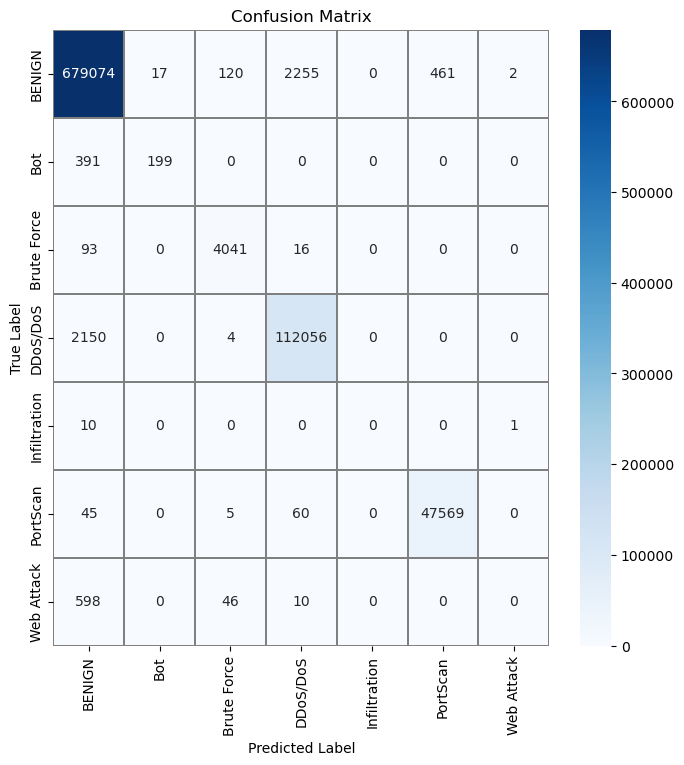



to Find ACC, FPR, TPR, ppv, FNR, TNR Per Class





Accuracy: [0.99276751 0.99951956 0.99966558 0.99470693 0.99998705 0.99932762
 0.99922635]

False Positive Rate (FPR) or False Alarm Rate (FAR): [1.96480448e-02 2.00322165e-05 2.07082702e-04 3.18497768e-03
 0.00000000e+00 5.75139980e-04 3.53536365e-06]

Recall or Detection Rate: [0.99581335 0.33728814 0.97373494 0.98114001 0.         0.9976929
 0.        ]

Precicion: [0.9951829  0.9212963  0.95849146 0.97953618        nan 0.99040183
 0.        ]

FNR: [0.00418665 0.66271186 0.02626506 0.01885999 1.         0.0023071
 1.        ]

TNR: [0.98035196 0.99997997 0.99979292 0.99681502 1.         0.99942486
 0.99999646]





D:\TEMP\AppData\Local\Temp\3\ipykernel_11488\3479764252.py:67: RuntimeWarning: invalid value encountered in divide
  PPV = TP/(TP+FP)
D:\TEMP\AppData\Local\Temp\3\ipykernel_11488\3479764252.py:75: RuntimeWarning: invalid value encountered in divide
  FDR = FP/(TP+FP)
d:\TEMP\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Macro Average Recall, Precision, and F1-score

macro_average_recall:  0.6122384760537308
macro_average_precision: 0.6921298097074641
macro_average_f1: 0.6328170080721724


Micro Average Recall, Precision, and F1-score

micro_average_recall: 0.9926002946222606
micro_average_precision: 0.9926002946222606
micro_average_f1: 0.9926002946222606


Macro Average False Positive Rate

Macro-average FPR: 0.0033769732431332923


Micro Average False Positive Rate

Micro-average FPR: 0.007399705377739416


Macro Average False Negative Rate

Macro Average FNR: 0.38776152394626917


Micro Average False Negative Rate

Micro-average FNR: 0.007399705377739416


Accuracy for Each Class

Class 0: Accuracy = 0.99276751
Class 1: Accuracy = 0.99951956
Class 2: Accuracy = 0.99966558
Class 3: Accuracy = 0.99470693
Class 4: Accuracy = 0.99998705
Class 5: Accuracy = 0.99932762
Class 6: Accuracy = 0.99922635


Method Two: 


False Positive Rate Using confusion_matrix computed


Class 0: FPR = 0.01964804
Class 1: F

In [ ]:
start = time.time()

evaluation(autoencoder_model, x_test, y_test)

end = time.time()
print("the taking time:", end - start)

# Binary

In [ ]:
df1=pd.read_csv("../MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df2=pd.read_csv("../MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df3=pd.read_csv("../MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv")
df4=pd.read_csv("../MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv")
df5=pd.read_csv("../MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df6=pd.read_csv("../MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df7=pd.read_csv("../MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv")
df8=pd.read_csv("../MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv")


df = pd.concat([df1,df2])
del df1,df2
df = pd.concat([df,df3])
del df3
df = pd.concat([df,df4])
del df4
df = pd.concat([df,df5])
del df5
df = pd.concat([df,df6])
del df6
df = pd.concat([df,df7])
del df7
df = pd.concat([df,df8])
del df8


In [ ]:
# Convert From Multi-class to Binary
attacks = []
for i in set(df[' Label']):
   if i == 'BENIGN':
      continue
   attacks.append(i)
print(attacks)

df[' Label'].replace(attacks, "Attack", inplace=True)

print(df[' Label'].value_counts())

['SSH-Patator', 'Infiltration', 'DoS Slowhttptest', 'DoS GoldenEye', 'DoS Hulk', 'DDoS', 'PortScan', 'FTP-Patator', 'Web Attack � Sql Injection', 'Web Attack � Brute Force', 'DoS slowloris', 'Heartbleed', 'Bot', 'Web Attack � XSS']
BENIGN    2273097
Attack     557646
Name:  Label, dtype: int64


In [ ]:
# removing the whitespace from the feature names
columns = []
for i in df.columns:
  columns.append(i.strip())

print(columns)

df.columns = columns

['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count

In [ ]:
df = df.sample(frac=1)


y = LabelEncoder().fit_transform(df['Label'])


# Fill NaN with average value of each class in this dataset
# nan_rows = df[df.isna().any(axis=1)].shape[0]
x_data = df.drop(columns=['Label'], axis=1)



for i in x_data:
  x_data[i].fillna(value= x_data[i].mean(), inplace=True)


# Temporary replace inf with NaN
x_data = x_data.replace([np.inf], np.nan)
# Replace inf with maximum value of each class in this dataset

for i in x_data:
  x_data[i].fillna(value= x_data[i].max(), inplace=True)


print("Replace negative values with minimum value of each class.")
# Temporary replace negative value with NaN
x_data[x_data < 0] = np.nan
# Replace negative value with minimum value of each class in this datase

for i in x_data:
  x_data[i].fillna(value= x_data[i].min(), inplace=True)




x = x_data.astype('float32')

# ## normalization
# scaler = StandardScaler()

# # scaler = MinMaxScaler()


# x = scaler.fit_transform(x)



# Method One

scaled_features = StandardScaler().fit_transform(x.values)

scaled_features_df = pd.DataFrame(scaled_features, index=x.index, columns=x.columns)

x = scaled_features_df

scaled_features_df = [0]


# Method two

# scaler = StandardScaler()

# for column in x.columns:
#     df[column] = x[column].apply(lambda x: scaler.fit_transform(x.reshape(-1, 1)).flatten())

# x = df

# df = 0
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
# removing all the element from the array to reduce the RAM usage
# x_data = [0]

Replace negative values with minimum value of each class.


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=8, stratify= y)

In [ ]:
def evaluation(model: keras.Model, x_test, y_test):

  from sklearn.metrics import recall_score, precision_score, precision_score, f1_score
  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import roc_curve, auc

    # to change the color
  class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'



  score = model.evaluate(x_test, y_test, verbose=False)
  print('Evaluation:\nLoss: {}\nAccuracy : {}\n'.format(score[0], score[1]))

  # F1 score
  y_pred = model.predict(x_test, batch_size=1024, verbose=True)
  y_pred = np.argmax(y_pred, axis=1)

   # it is for multi classification
  label_multi_class = ['BENIGN', 'Bot', 'Brute Force', 'DDoS/DoS', 'Infiltration', 'PortScan', 'Web Attack']

  # it is for binary classification
  label = ['Attack', 'Normal']
  # classification report
  print("\n{}".format(classification_report(y_test, y_pred, digits=5, target_names= label)))


  # Create confusion matrix
  confusion_m = confusion_matrix(y_test, y_pred)


  f,ax = plt.subplots(figsize=(8, 8))
  sns.heatmap(confusion_m, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray",fmt='', ax=ax, xticklabels= label, yticklabels= label)
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title("Confusion Matrix")
  plt.show()


  print('')
  print('')

  # to Find ACC, FPR, TPR, ppv, FNR, TNR Per Class

  print(color.BOLD + 'to Find ACC, FPR, TPR, ppv, FNR, TNR Per Class' + color.END)

  FP = confusion_m.sum(axis=0) - np.diag(confusion_m)
  FN = confusion_m.sum(axis=1) - np.diag(confusion_m)
  TP = np.diag(confusion_m)
  TN = confusion_m.sum() - (FP + FN + TP)

  # Sensitivity, hit rate, recall, or true positive rate
  TPR = TP/(TP+FN)
  # Specificity or true negative rate
  TNR = TN/(TN+FP)
  # Precision or positive predictive value
  PPV = TP/(TP+FP)
  # Negative predictive value
  NPV = TN/(TN+FN)
  # Fall out or false positive rate
  FPR = FP/(FP+TN)
  # False negative rate
  FNR = FN/(TP+FN)
  # False discovery rate
  FDR = FP/(TP+FP)

  # Overall accuracy
  ACC = (TP+TN)/(TP+FP+FN+TN)


  print('')
  print('')
  print('')


  print('')
  print('')



  print('Accuracy:', ACC)
  print('')
  print('False Positive Rate (FPR) or False Alarm Rate (FAR):', FPR)
  print('')
  print('Recall or Detection Rate:', TPR)
  print('')
  print('Precicion:', PPV)
  print('')
  print('FNR:', FNR)
  print('')
  print('TNR:', TNR)


  print('')
  print('')
  print('')



  # to find the macro and micro average
  macro_average_recall = recall_score(y_test, y_pred, average='macro')
  macro_average_precision = precision_score(y_test, y_pred, average='macro')
  macro_average_f1 = f1_score(y_test, y_pred, average='macro')

  micro_average_recall = recall_score(y_test, y_pred, average='micro')
  micro_average_precision = precision_score(y_test, y_pred, average='micro')
  micro_average_f1 = f1_score(y_test, y_pred, average='micro')



  # macro average

  print(color.BOLD + 'Macro Average Recall, Precision, and F1-score' + color.END)

  print("")


  print('macro_average_recall: ', macro_average_recall)
  print('macro_average_precision:', macro_average_precision)
  print('macro_average_f1:', macro_average_f1)

  print("")
  print("")

  print(color.BOLD + 'Micro Average Recall, Precision, and F1-score' + color.END)

  print("")


  # macro average

  print('micro_average_recall:', micro_average_recall)
  print('micro_average_precision:', micro_average_precision)
  print('micro_average_f1:', micro_average_f1)


  print('')
  print('')




  print(color.BOLD + 'Macro Average False Positive Rate' + color.END)

  print("")


  # Macro Average False Positive Rate

  # conf_matrix = confusion_matrix(y_test, y_pred)
  conf_matrix = confusion_m

  num_classes = len(conf_matrix)


  # Calculate False Positive Rate for each class
  FPR_values = []
  for i in range(num_classes):
    FP = conf_matrix.sum(axis=0)[i] - conf_matrix[i, i]
    TN = conf_matrix.sum() - conf_matrix.sum(axis=0)[i] - conf_matrix.sum(axis=1)[i] + conf_matrix[i, i]
    FPR = FP / (FP + TN)
    FPR_values.append(FPR)


  # Calculate macro-average FPR
  macro_average_FPR = sum(FPR_values) / num_classes
  print("Macro-average FPR:", macro_average_FPR)


  print("")
  print("")



  # Micro Average False Positive Rate

  print(color.BOLD + 'Micro Average False Positive Rate' + color.END)

  print('')

  # conf_matrix = confusion_matrix(y_test, y_pred)

  conf_matrix = confusion_m

  # Calculate total false positives and true negatives
  total_FP = conf_matrix.sum(axis=0).sum() - np.diag(conf_matrix).sum()
  total_TN = conf_matrix.sum() - total_FP


  micro_average_FPR = total_FP / (total_FP + total_TN)
  print("Micro-average FPR:", micro_average_FPR)

  print("")
  print("")




  print(color.BOLD + 'Macro Average False Negative Rate' + color.END)

  print("")

  # Assuming y_true contains true labels and y_pred contains predicted labels
  # conf_matrix = confusion_matrix(y_true, y_pred)

  conf_matrix = confusion_m

  # Get the number of classes
  num_classes = len(conf_matrix)

  # Calculate False Negative Rate for each class
  FNR_values = []
  for i in range(num_classes):
    FN = conf_matrix.sum(axis=1)[i] - conf_matrix[i, i]
    TP = conf_matrix[i, i]
    FNR = FN / (FN + TP)
    FNR_values.append(FNR)

  # Calculate macro average FNR
  macro_average_FNR = sum(FNR_values) / num_classes
  print("Macro Average FNR:", macro_average_FNR)


  print("")
  print("")



  print(color.BOLD + 'Micro Average False Negative Rate' + color.END)

  print("")


  # conf_matrix = confusion_matrix(y_true, y_pred)

  conf_matrix = confusion_m

  # Calculate total false negatives and true positives
  total_FN = conf_matrix.sum(axis=1).sum() - np.diag(conf_matrix).sum()
  total_TP = np.diag(conf_matrix).sum()

  # Calculate micro-average FNR
  micro_average_FNR = total_FN / (total_FN + total_TP)
  print("Micro-average FNR:", micro_average_FNR)


  print("")
  print("")





  print(color.BOLD + 'Accuracy for Each Class' + color.END)

  print("")


  # conf_matrix = confusion_matrix(y_true, y_pred)

  conf_matrix = confusion_m

  # Calculate accuracy for each class
  accuracy_values = []
  for i in range(num_classes):
    TP = conf_matrix[i, i]
    TN = conf_matrix.sum() - conf_matrix.sum(axis=0)[i] - conf_matrix.sum(axis=1)[i] + conf_matrix[i, i]
    FP = conf_matrix.sum(axis=0)[i] - TP
    FN = conf_matrix.sum(axis=1)[i] - TP
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy_values.append(accuracy)

  # Print accuracy values for each class
  for class_index, accuracy in enumerate(accuracy_values):
    print(f"Class {class_index}: Accuracy = {accuracy:.8f}")




















  print('')
  print('')




  print(color.RED + 'Method Two: ' + color.END)



  print('')
  print('')



  # Fiding False Positive Rate

  print(color.BOLD + "False Positive Rate Using confusion_matrix computed" + color.END)

  print('')
  print('')

  # conf_matrix = confusion_matrix(y_test, y_pred)

  conf_matrix = confusion_m


  # Get the number of classes
  num_classes = len(conf_matrix)
  FPR_values = []


  for i in range(num_classes):
    FP = conf_matrix.sum(axis=0)[i] - conf_matrix[i, i]
    TN = conf_matrix.sum() - conf_matrix.sum(axis=0)[i] - conf_matrix.sum(axis=1)[i] + conf_matrix[i, i]
    FPR = FP / (FP + TN)
    FPR_values.append(FPR)

  for class_index, fpr in enumerate(FPR_values):
    print(f"Class {class_index}: FPR = {fpr:.8f}")


  print('')
  print('')






  # print('')
  # print('')

  # print(color.BOLD + "False Positive Rate Using sklearn computed" + color.END)

  # print('')
  # print('')



  # fpr_values = dict()  # To store FPR values for each class


  # conf_matrix = confusion_matrix(y_test, y_pred)

  # num_classes = len(conf_matrix)

  # # Calculate ROC curve for each class
  # for class_index in range(num_classes):


  #     start_idx = class_index * len(y_pred)
  #     end_idx = (class_index + 1) * len(y_pred)
  #     fpr, _, _ = roc_curve(y_test[start_idx:end_idx], y_pred[start_idx:end_idx])
  #     fpr_values[class_index] = fpr

  # # Print FPR values for each class
  # for class_index, fpr in fpr_values.items():
  #     print(f"Class {class_index}: FPR values = {fpr}")

#   print('')
#   print('')

#   print(color.BOLD + "False Positive Rate Using sklearn computed" + color.END)

#   print('')

#   from sklearn.preprocessing import label_binarize


#   y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])

#   y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2, 3, 4, 5, 6])


#   fpr = dict()
#   tpr = dict()
#   roc_auc = dict()
#   fpr_values = dict()

#   conf_matrix = confusion_matrix(y_test, y_pred)

#   num_classes = len(conf_matrix)


#   for i in range(num_classes):
#     fpr, _, _= roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
#     fpr_values[i] = fpr[1]



#   for class_index, fpr in fpr_values.items():
#     print(f"Class {class_index}: FPR values = {fpr}")








  print('')
  print('')


# Autoencoder

In [ ]:
# def build_model():
#     # Creating layers
#     inputs = keras.layers.Input(shape=(35, ))

#     x = keras.layers.Dense(units= 35, activation='relu')(inputs) # Level one

#     x = keras.layers.BatchNormalization()(x)

#     x = keras.layers.Dropout(0.1)(x)

#     x = keras.layers.Dense(units= 15, activation='relu')(x) # Level two

#     x = keras.layers.BatchNormalization()(x)

#     x = keras.layers.Dense(units= 7, activation='relu')(x) # bottleneck

#     x = keras.layers.BatchNormalization()(x)

#     x = keras.layers.Dense(units= 15, activation='relu')(x) # Level two

#     x = keras.layers.BatchNormalization()(x)

#     x = keras.layers.Dropout(0.3)(x)

#     x = keras.layers.Dense(units= 35, activation='relu')(x) # Level one

#     outputs = keras.layers.Dense(7, activation='softmax')(x)

#     model = keras.Model(inputs=inputs, outputs=outputs)

#     model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=keras.optimizers.Adam(learning_rate= 0.001))

#     return model

# autoencoder_model = build_model()





def build_model():
    # Creating layers
    inputs = keras.layers.Input(shape=(78, ))

    x = keras.layers.Dense(units= 78, activation='relu')(inputs) # Level one

    x = keras.layers.BatchNormalization()(x)

    x = keras.layers.Dropout(0.1)(x)

    x = keras.layers.Dense(units= 15, activation='relu')(x) # Level two

    x = keras.layers.BatchNormalization()(x)

    x = keras.layers.Dense(units= 7, activation='relu')(x) # bottleneck

    x = keras.layers.BatchNormalization()(x)

    x = keras.layers.Dense(units= 15, activation='relu')(x) # Level two

    x = keras.layers.BatchNormalization()(x)

    x = keras.layers.Dropout(0.3)(x)

    x = keras.layers.Dense(units= 35, activation='relu')(x) # Level one

    outputs = keras.layers.Dense(2, activation='softmax')(x)

    model = keras.Model(inputs=inputs, outputs=outputs)

    model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=keras.optimizers.Adam(learning_rate= 0.001))

    return model

autoencoder_model = build_model()

In [ ]:
start = time.time()

autoencoder_model.fit(x_train, y_train, epochs= 100, verbose=1, validation_split=0.2, callbacks=[early_stop], batch_size= 128)

end = time.time()
print("the taking time:", end - start)

Epoch 1/100
12385/12385 [==============================] - 102s 8ms/step - loss: 0.0231 - accuracy: 0.9906 - val_loss: 0.0290 - val_accuracy: 0.9898
Epoch 2/100
12385/12385 [==============================] - 105s 8ms/step - loss: 0.0237 - accuracy: 0.9901 - val_loss: 0.0237 - val_accuracy: 0.9905
the taking time: 207.5120406150818


Evaluation:
Loss: 0.02377908304333687
Accuracy : 0.9904924631118774

830/830 [==============================] - 1s 2ms/step

              precision    recall  f1-score   support

      Attack    0.96863   0.98364   0.97608    167294
      Normal    0.99597   0.99219   0.99407    681929

    accuracy                        0.99050    849223
   macro avg    0.98230   0.98791   0.98508    849223
weighted avg    0.99059   0.99050   0.99053    849223



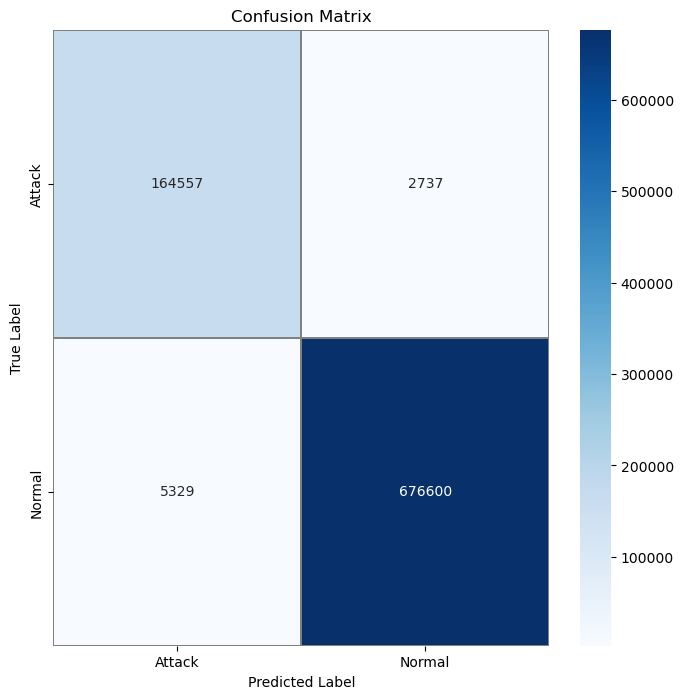



to Find ACC, FPR, TPR, ppv, FNR, TNR Per Class





Accuracy: [0.99050191 0.99050191]

False Positive Rate (FPR) or False Alarm Rate (FAR): [0.0078146  0.01636042]

Recall or Detection Rate: [0.98363958 0.9921854 ]

Precicion: [0.96863191 0.99597107]

FNR: [0.01636042 0.0078146 ]

TNR: [0.9921854  0.98363958]



Macro Average Recall, Precision, and F1-score

macro_average_recall:  0.9879124920421543
macro_average_precision: 0.9823014889483694
macro_average_f1: 0.985076346331534


Micro Average Recall, Precision, and F1-score

micro_average_recall: 0.9905019058598271
micro_average_precision: 0.9905019058598271
micro_average_f1: 0.9905019058598271


Macro Average False Positive Rate

Macro-average FPR: 0.012087507957845765


Micro Average False Positive Rate

Micro-average FPR: 0.00949809414017284


Macro Average False Negative Rate

Macro Average FNR: 0.012087507957845765


Micro Average False Negative Rate

Micro-average FNR: 0.00949809414017284


Accuracy for Each Class

Class 0: Ac

In [ ]:
start = time.time()

evaluation(autoencoder_model, x_test, y_test)

end = time.time()
print("the taking time:", end - start)